In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve


/tmp/ipykernel_37450/2396467138.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [12]:
red_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink/forML_study_data/main/data/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep=';')
white_wine = pd.read_csv(white_url, sep=';')
red_wine['color']=1.
white_wine['color']=0.
wine = pd.concat([red_wine, white_wine])
wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]
x = wine.drop(['taste', 'quality'], axis=1)
y = wine['taste']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

wine_tree = DecisionTreeClassifier(max_depth=2, random_state=5)
wine_tree.fit(x_train, y_train)
y_pred_tr = wine_tree.predict(x_train)
y_pred_test = wine_tree.predict(x_test)
print('Train Acc    : ', accuracy_score(y_train, y_pred_tr))
print('Test Acc     : ', accuracy_score(y_test, y_pred_test))

Train Acc    :  0.7356167019434289
Test Acc     :  0.7338461538461538


In [6]:
kfold = KFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=5)
for train_idx, test_idx in kfold.split(x) :
    print(len(train_idx), len(test_idx))

5197 1300
5197 1300
5198 1299
5198 1299
5198 1299


In [9]:
cv_accuracy = []

for train_idx, test_idx in kfold.split(x) :
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(x_train, y_train)
    pred = wine_tree_cv.predict(x_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

np.mean(cv_accuracy)

0.709578255462782

In [13]:
skfold = StratifiedKFold(n_splits=5)
wine_tree_cv = DecisionTreeClassifier(max_depth=2, random_state=5)

cv_accuracy = []

for train_idx, test_idx in skfold.split(x, y) :
    x_train, x_test = x.iloc[train_idx], x.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    wine_tree_cv.fit(x_train, y_train)
    pred = wine_tree_cv.predict(x_test)
    cv_accuracy.append(accuracy_score(y_test, pred))

np.mean(cv_accuracy)

0.6888004974240539

In [14]:
from sklearn.model_selection import cross_validate
cross_validate(wine_tree_cv, x, y, scoring=None, cv=skfold, return_train_score=True)

{'fit_time': array([0.00616646, 0.01054645, 0.00855327, 0.01080275, 0.0091877 ]),
 'score_time': array([0.00357151, 0.00417185, 0.00423884, 0.00379777, 0.00240207]),
 'test_score': array([0.55230769, 0.68846154, 0.71439569, 0.73210162, 0.75673595]),
 'train_score': array([0.74773908, 0.74696941, 0.74317045, 0.73509042, 0.73258946])}

In [4]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth':[2,4,7,10]}
wine_tree = DecisionTreeClassifier(max_depth=2, random_state=5)
gridsearch = GridSearchCV(estimator=wine_tree, param_grid=params, cv=5)
gridsearch.fit(x, y)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=2, random_state=5),
             param_grid={'max_depth': [2, 4, 7, 10]})

In [33]:
import pprint

pp = pprint.PrettyPrinter(indent=4)
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00800738, 0.01202769, 0.01971841, 0.02588949]),
    'mean_score_time': array([0.00225973, 0.00204344, 0.00253177, 0.00254459]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65186925, 0.64463125]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50307692, 0.51461538]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60615385, 0.60538462]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.67898383, 0.66358737]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73595073, 0.71978445]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.7197844

In [8]:
gridsearch.best_estimator_

DecisionTreeClassifier(max_depth=2, random_state=5)

In [9]:
gridsearch.best_score_

0.6888004974240539

In [10]:
gridsearch.best_params_

{'max_depth': 2}

In [29]:
estimators = [('scaler', StandardScaler()), ('clf', DecisionTreeClassifier(random_state=5))]
pipe = Pipeline(estimators)

param_grid = [ {'clf__max_depth':list(range(1,10))}]
GridSearch = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5)
GridSearch.fit(x, y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('clf',
                                        DecisionTreeClassifier(random_state=5))]),
             param_grid=[{'clf__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]}])

In [30]:
pp.pprint(gridsearch.cv_results_)

{   'mean_fit_time': array([0.00800738, 0.01202769, 0.01971841, 0.02588949]),
    'mean_score_time': array([0.00225973, 0.00204344, 0.00253177, 0.00254459]),
    'mean_test_score': array([0.6888005 , 0.66356523, 0.65186925, 0.64463125]),
    'param_max_depth': masked_array(data=[2, 4, 7, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
    'params': [   {'max_depth': 2},
                  {'max_depth': 4},
                  {'max_depth': 7},
                  {'max_depth': 10}],
    'rank_test_score': array([1, 2, 3, 4], dtype=int32),
    'split0_test_score': array([0.55230769, 0.51230769, 0.50307692, 0.51461538]),
    'split1_test_score': array([0.68846154, 0.63153846, 0.60615385, 0.60538462]),
    'split2_test_score': array([0.71439569, 0.72363356, 0.67898383, 0.66358737]),
    'split3_test_score': array([0.73210162, 0.73210162, 0.73595073, 0.71978445]),
    'split4_test_score': array([0.75673595, 0.7182448 , 0.73518091, 0.7197844

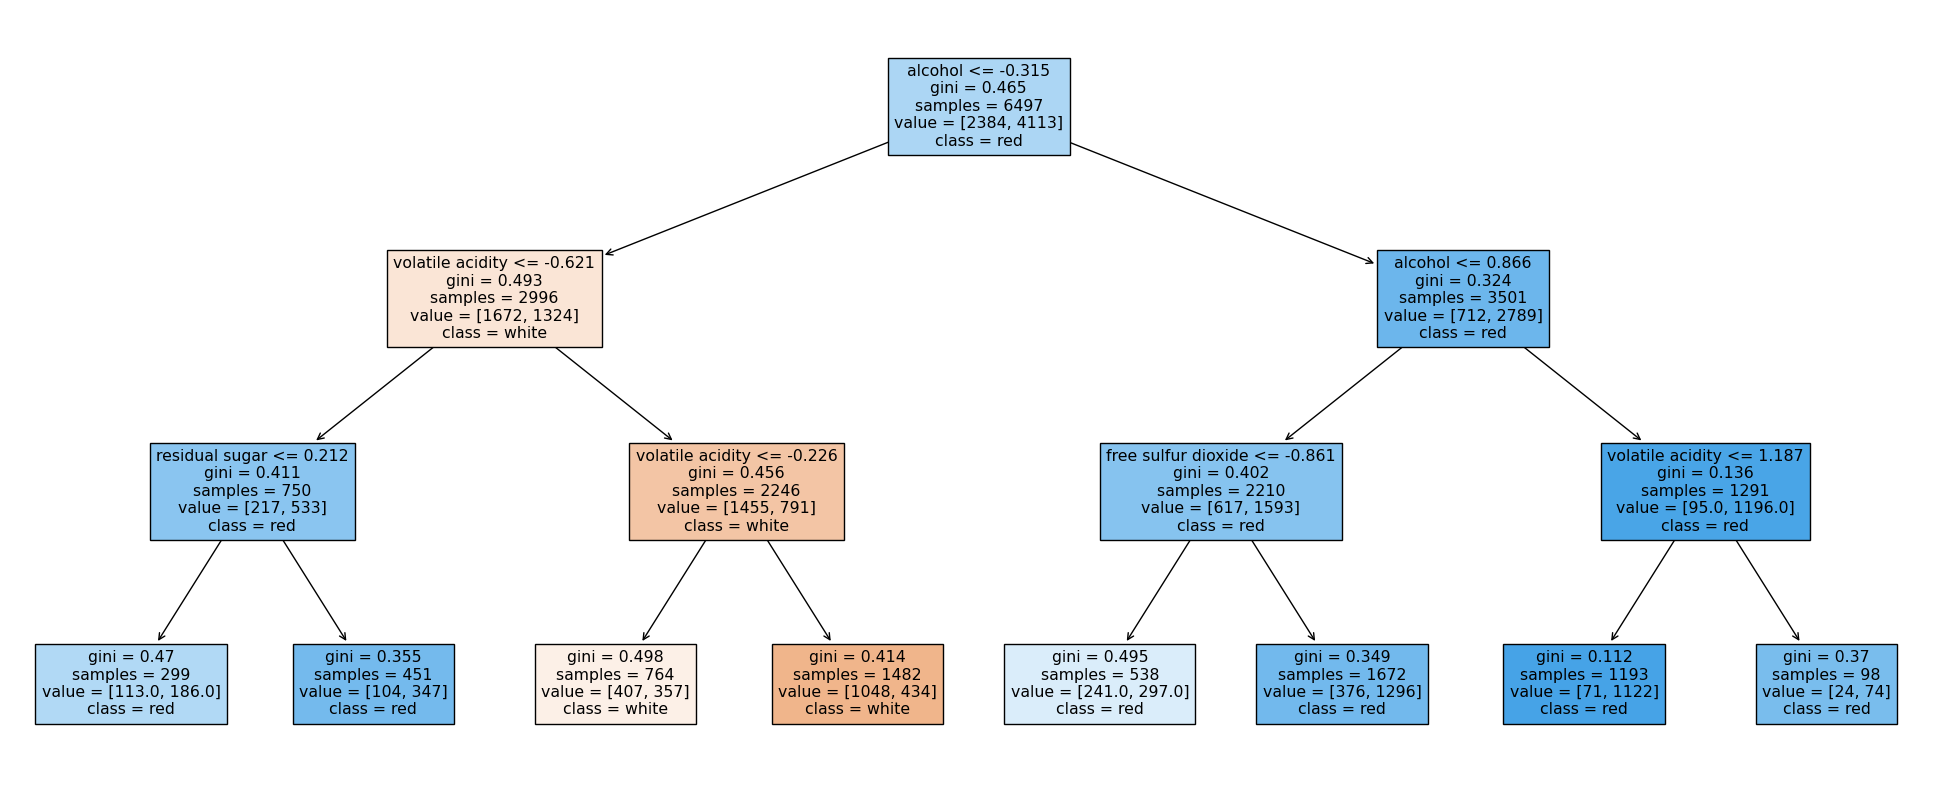

In [31]:
fig = plt.figure(figsize=(25,10))
_ = tree.plot_tree(GridSearch.best_estimator_['clf'], feature_names=x_train.columns, class_names =['white', 'red'], filled=True)

In [32]:
score_df = pd.DataFrame(GridSearch.cv_results_)
score_df.sort_values(order)
score_df[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
0,{'clf__max_depth': 1},3,0.669090,0.058340
1,{'clf__max_depth': 2},2,0.688800,0.071799
2,{'clf__max_depth': 3},1,0.692031,0.065688
3,{'clf__max_depth': 4},5,0.663565,0.083905
4,{'clf__max_depth': 5},4,0.667262,0.093570
5,{'clf__max_depth': 6},6,0.659718,0.084843
6,{'clf__max_depth': 7},9,0.651715,0.088118
7,{'clf__max_depth': 8},7,0.653405,0.079120
8,{'clf__max_depth': 9},8,0.651867,0.088782
